In [132]:
import pandas as pd
import numpy as np

df =pd.read_csv('hourly_data.csv', index_col = ['date_time'], parse_dates=['date_time'])
# df.head()
len(df)

df.iloc[-100:].index

DatetimeIndex(['2018-02-18 21:00:00', '2018-02-18 22:00:00',
               '2018-02-18 23:00:00', '2018-02-19 00:00:00',
               '2018-02-19 01:00:00', '2018-02-19 02:00:00',
               '2018-02-19 03:00:00', '2018-02-19 04:00:00',
               '2018-02-19 05:00:00', '2018-02-19 06:00:00',
               '2018-02-19 07:00:00', '2018-02-19 08:00:00',
               '2018-02-19 09:00:00', '2018-02-19 10:00:00',
               '2018-02-19 11:00:00', '2018-02-19 12:00:00',
               '2018-02-19 13:00:00', '2018-02-19 14:00:00',
               '2018-02-19 15:00:00', '2018-02-19 16:00:00',
               '2018-02-19 17:00:00', '2018-02-19 18:00:00',
               '2018-02-19 19:00:00', '2018-02-19 20:00:00',
               '2018-02-19 21:00:00', '2018-02-19 22:00:00',
               '2018-02-19 23:00:00', '2018-02-20 00:00:00',
               '2018-02-20 01:00:00', '2018-02-20 02:00:00',
               '2018-02-20 03:00:00', '2018-02-20 04:00:00',
               '2018-02-

In [16]:
beta = df.groupby([df.index.hour]).mean()
beta = beta['available_spots']
beta = list(beta)
theta = df.groupby([df.index.dayofweek]).mean()
theta = theta['available_spots']
theta = list(theta)

In [130]:
data = pd.read_csv('hourly_data.csv', index_col=['date_time'], parse_dates=['date_time'])
X = np.array(data['X'])
y = np.array(data['y'])


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [136]:
empty_list = [] 
features = []
for i in range(11):
    features.append(list(empty_list))
for index,row in data.iterrows():
    features[0].append(row['X'])
    hour = index.hour
#     print(index)
    day_week = index.dayofweek
    n = int(hour/4) +1
    features[n].append(1)
    if day_week >4 : 
        features[10].append(1)
        features[9].append(0)
    else: 
        features[9].append(1)
        features[10].append(0)
    for i in range(1,9):
        if i != n:
            features[i].append(0)
colum_names = ['X0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
new_cols = np.column_stack(features)

In [143]:
X_train = new_cols[:3000]
X_test = new_cols[3000:]
len(new_cols),len(train),len(test)

(3651, 3000, 651)

In [145]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train = y[:3000]
y_test = y[3000:]
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_,regr.intercept_)
y_pred = regr.predict(X_test)
regr.score(X_test,y_test)

[  0.93135538   9.29142826   3.59417618   2.27805815 -10.39134137
  -9.56524428   4.79292306   0.           0.           0.09363064
  -0.09363064] 8.5080803479


0.93324173872445015

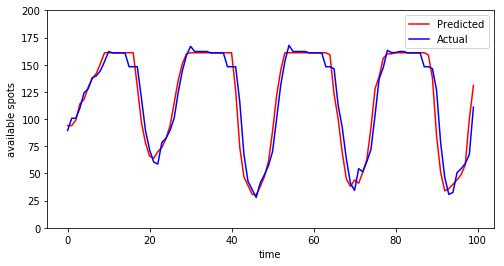

In [165]:
def rms(actual,predicted):
    return sqrt(mean_squared_error(actual, predicted))

def r2(actual,predicted):
    mean_actual = np.mean(actual)
    actual = np.array(actual)
    predicted = np.array(predicted)
    rss = np.sum((actual-predicted)**2)
    tss = np.sum((actual-mean_actual)**2)
    final = 1 - (rss/tss)
    return final

def accuracy_tolerance(act_set,pred_set, tolerance=10.0):
    if len(pred_set) != len(act_set):
        raise ValueError('prediction and actual set lengths dont match')
    
    n = len(pred_set)
    count = 0
    for i in range(n):
        if abs(pred_set[i] - act_set[i]) <= tolerance: count += 1
    acc = float(count) / float(n)
    return acc

def calculate_accuracy(actual, predicted,model_name='No Name'):
    d = {}
    d['name'] = model_name
    d['r2'] = r2(actual,predicted)
    d['tol'] = accuracy_tolerance(actual,predicted)
    d['rms'] = rms(actual,predicted)
    return d

def plot_graph(y_act, y_pred):
    # y_pred : 1D array predicted values
    # y_act : 1D array actual values
    if (len(y_act)!=100):
        raise ValueError('Test set should contain 100 values only')
    if (len(y_pred) != len(y_act)):
        raise ValueError('actual and predicted values dont have the same lengths')
        
    x = [i for i in range(len(y_pred))]
    plt.figure(figsize=(8, 4))
    plt.plot(x, y_pred, 'r-', label='Predicted')
    plt.plot(x, y_act, 'b-', label='Actual')
    axes = plt.gca()
    axes.set_ylim([0, 200])
    plt.ylabel('available spots')
    plt.xlabel('time')
    plt.legend(loc='best')
#     plt.xticks(x)
    plt.legend()
    plt.show()
    

plot_graph(y_pred[-100:],y_test[-100:])

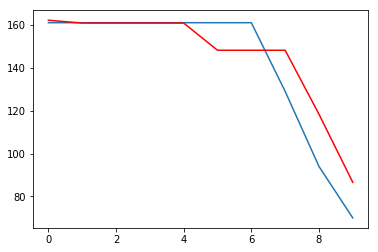

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(y[:10])
plt.plot(y_pred[:10] , color='red')
plt.show()

In [113]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(y, y_pred))
print(rms)

11.554720089280151


0.7502054231717338


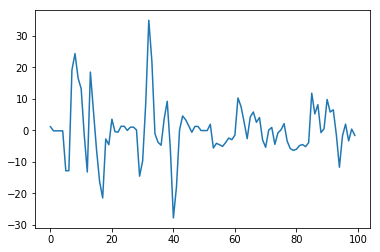

In [123]:
def calc_accuracy(pred_set, act_set, tolerance=5.0):
    if len(pred_set) != len(act_set):
        raise ValueError('prediction and actual set lengths dont match')
    
    n = len(pred_set)
    count = 0
    dev_act = []
    dev_pred = []
    i_set = []
    for i in range(n):
        if abs(pred_set[i] - act_set[i]) <= tolerance: 
            count += 1
        else:
            dev_act.append(act_set[i])
            dev_pred.append(pred_set[i])
            i_set.append(i)
    acc = float(count) / float(n)
    return acc, dev_act, dev_pred, i_set

acc, dev_act, dev_pred, i_set = calc_accuracy(y_pred, y, 10)

print(acc)

import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(np.subtract(y_pred[:100], y[:100]))
plt.show()

In [142]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = np.array(X)
X = np.reshape(X,(-1,1))

X_train = X[:3000]
y_train = y[:3000]
X_test = X[3000:]
y_test = y[3000:]


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_,regr.intercept_)
y_pred = regr.predict(X_test)
regr.score(X_test,y_pred)

[ 0.94213464] 7.17819134841


1.0

In [80]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

14.496886493118431
